Nous allons implanter le calcul de la distribution des mots d’un texte (son vocabu-
laire) en fonction de leur taille en caractères.

**Constitution du corpus**

Récupérez les 2 fichiers textes (plain text utf-8) accessibles à l'adresse suivante :

* ”Le discours de la méthode” (fr) http://www.gutenberg.org/ebooks/13846
* ”Ulysses” (en) http://www.gutenberg.org/ebooks/4300

Les enregistrer à la racine de votre Notebook dans un dossier corpus.

* **lire** les textes
* **découper** en mots (ou tokeniser)
* **compter** le nombre de mots par taille de caractères
* **observer** les résultats chiffrés
* **représenter** cela sur une courbe

## Etape 1: lire le texte 

In [4]:
import glob #glob est une librairie Python qui nous permettra de parcourir les fichiers de votre disque
print(glob.glob("*"))
#NB: observez que c'est une liste Python

['TD3.ipynb', 'corpus', 'Python_Install.tex', 'TD1.ipynb', 'L5SOPROG_TD1.ipynb', 'TD2.ipynb']


La **méthode** glob de la **librairie** du même nom prend en **paramètre** (entre parenthèses) un chemin (sous forme de chaîne de caractères). 

Ici "*" signifie que l'on demande à Python d'afficher tout le contenu du dossier courant. Vous n'avez pas forcément les mêmes fichiers que moi mais si vous avez bien suivi les instructions plus haut, vous avez aussi un dossier nommé corpus. 
Nous allons maintenant afficher son contenu:

In [9]:
print(glob.glob("corpus/*"))#NB: "/" indique que l'on va chercher dans le dossier. 

['corpus/13846-0.txt', 'corpus/4300-0.txt']


NB : Si vous êtes sous Windows vous devrez peut être écrire "corpus\\*"

Maitenant ouvrons ce fichier. Observez que la **fonction** open prend trois **paramètres** : le chemin, le mode d'ouverture ("r" pour _read_) et l'encodage (ou encoding)

In [12]:
f = open("corpus/13846-0.txt", "r", encoding = "utf-8")
chaine = f.read()# La méthode read ouvre sous forme de chaîne de caractères
f.close()#on ferme le fichier

### Manipulation de chaînes de caractères

In [15]:
#Les 100 premiers caractères :
print(chaine[:100])

﻿The Project Gutenberg EBook of Discours de la méthode, by René Descartes

This eBook is for the use


In [28]:
#Les caractèes 939 à 1089 (remarquez que l'on a les sauts de ligne):
print(chaine[939:1089])

PUBLIÉES PAR VICTOR COUSIN.



A

M. ROYER-COLLARD,

Professeur de l'histoire de la philosophie morale à la Faculté des
Lettres de l'Académie de Paris


In [32]:
# Les 200 derniers caractères :
print(chaine[-200:])

 donations to the Project Gutenberg Literary
Archive Foundation, how to help produce our new eBooks, and how to
subscribe to our email newsletter to hear about new eBooks.

*** END: FULL LICENSE ***




## Etape 2 : Découpage en mots (tokenisation)

NB: sur le formatage de chaînes de caractères ("%i"%variable dans cet exemple puis f"{variable}" par la suite) vous pouvez allez regarder le lien suivant : https://stackoverflow.com/questions/5082452/string-formatting-vs-format

In [39]:
#La méthode split permet de faire un découpage simple en mots. Exemple avec le segment de texte précédent :
print(chaine[-200:].split())

['donations', 'to', 'the', 'Project', 'Gutenberg', 'Literary', 'Archive', 'Foundation,', 'how', 'to', 'help', 'produce', 'our', 'new', 'eBooks,', 'and', 'how', 'to', 'subscribe', 'to', 'our', 'email', 'newsletter', 'to', 'hear', 'about', 'new', 'eBooks.', '***', 'END:', 'FULL', 'LICENSE', '***']


In [43]:
# Maintenant on le fait sur tout le texte mais on stocke au lieu de faire un print
liste_mots = chaine .split ()
print(" Le texte contient au total %i mots" %len(liste_mots))
# "%i" permet d'insérer une variable de type "Integer" dans une chaîne de caractères. Equivalent à :
#print(" Le texte contient au total "+ str(len(liste_mots)) + " mots" )

 Le texte contient au total 118787 mots


## Etape 3 : Comptage des mots
On va utiliser un **dictionnaire** Python (ou tableau associatif) où l'on va stocker pour chaque longueur en caractères le nombre de mots qu'on a rencontré.

L'**algorithme** est le suivant:
* pour chaque mot de la liste de mots, on calcule sa longueur
* on vérifie si on a déjà rencontré un mot de cette longueur:
  * Si c'est le premier mot pour cette longueur on crée une **clé** (une entrée dans le dictionnaire) pour cette longueur à laquelle on affecte la **valeur** 1 (on a vu cette longueur de mots 1 fois)
  * Sinon, on **incrémente** de 1 la valeur existante (on a vu cette longueur 1 fois de plus)


In [51]:
## Une première version sur un échantillon:
dic_longueurs = {} #un dictionnaire vide

for mot in liste_mots[1:20]: #on prend les mots 1 à 20 (arbitraire)
  longueur = len(mot)#la longueur du mot
  if longueur not in dic_longueurs: #on a jamais vu cette longueur de mot
    dic_longueurs[longueur]=1 #
    print(f"Premier mot de {longueur} caractères : {mot}")
    #NB: précéder la chaîne de f permet d'ajouter des variables dans la chaîne à partir de leur nom
  else: #on a vu cette longueur de mot
    dic_longueurs[longueur]+=1

for longueur, nombre in dic_longueurs.items():
    print(f"On a {nombre} mots de {longueur} caractères")
print(dic_longueurs)#pour avoir une vue de ce qu'on a fait

Premier mot de 7 caractères : Project
Premier mot de 9 caractères : Gutenberg
Premier mot de 5 caractères : EBook
Premier mot de 2 caractères : of
Premier mot de 8 caractères : Discours
Premier mot de 4 caractères : René
Premier mot de 3 caractères : for
Premier mot de 6 caractères : anyone
On a 1 mots de 7 caractères
On a 2 mots de 9 caractères
On a 2 mots de 5 caractères
On a 6 mots de 2 caractères
On a 2 mots de 8 caractères
On a 2 mots de 4 caractères
On a 3 mots de 3 caractères
On a 1 mots de 6 caractères
{7: 1, 9: 2, 5: 2, 2: 6, 8: 2, 4: 2, 3: 3, 6: 1}


#### NB: quand on va travailler sur tout le texte on ne va pas faire tous ces _print_ .  Les _print_ permettent de vérifier que ce que l'on fait marche bien

In [52]:
dic_longueurs = {} #on réinititalise le dictionnaire (i.e. pour qu'il soit vide)

for mot in liste_mots: 
  longueur = len(mot)
  if longueur not in dic_longueurs:
    dic_longueurs[longueur]=1 #
  else:#on a vu cette longueur de mot
    dic_longueurs[longueur]+=1

print(dic_longueurs)

{4: 15694, 7: 9158, 9: 6051, 5: 13169, 2: 26680, 8: 6888, 3: 18999, 6: 9970, 12: 1476, 11: 2294, 17: 16, 10: 3986, 13: 861, 1: 2798, 14: 501, 15: 160, 16: 69, 18: 4, 20: 2, 38: 1, 24: 2, 22: 1, 39: 1, 30: 1, 21: 2, 29: 1, 19: 1, 23: 1}


## Etape 4 : Observation des résultats

Un dictionnaire n'est pas une **structure de données** qui peut être directement triée (ou ordonnée). Pour vérifier que'on trouve des résultats proche de l'attendu, on va afficher le nombre d'occurences enregistré dans _dic_longueurs_ pour toutes les longueurs de 1 à 30 en utilisant **l'itérateur** _range_ pour afficher dans l'ordre croissant de taille en caractères.

In [53]:
for toto in range(30):
  if toto in dic_longueurs:
    nbr_occurences = dic_longueurs[toto]
  else:
    nbr_occurences = 0
  print(f"Longueur {toto}, {nbr_occurences} occurrences")


Longueur 0, 0 occurrences
Longueur 1, 2798 occurrences
Longueur 2, 26680 occurrences
Longueur 3, 18999 occurrences
Longueur 4, 15694 occurrences
Longueur 5, 13169 occurrences
Longueur 6, 9970 occurrences
Longueur 7, 9158 occurrences
Longueur 8, 6888 occurrences
Longueur 9, 6051 occurrences
Longueur 10, 3986 occurrences
Longueur 11, 2294 occurrences
Longueur 12, 1476 occurrences
Longueur 13, 861 occurrences
Longueur 14, 501 occurrences
Longueur 15, 160 occurrences
Longueur 16, 69 occurrences
Longueur 17, 16 occurrences
Longueur 18, 4 occurrences
Longueur 19, 1 occurrences
Longueur 20, 2 occurrences
Longueur 21, 2 occurrences
Longueur 22, 1 occurrences
Longueur 23, 1 occurrences
Longueur 24, 2 occurrences
Longueur 25, 0 occurrences
Longueur 26, 0 occurrences
Longueur 27, 0 occurrences
Longueur 28, 0 occurrences
Longueur 29, 1 occurrences


### Etape 5 : Représentation graphique

Et maintenant c'est magique, on va créer une courbe grâce à la **librairie** _pyplot_ de _matplotlib_. On va importer cette librairie et la renommer pour que ça soit plus court à écrire. Puis pour avoir les valeurs à mettre sur la courbe on va lire les valeurs dans l'ordre croissant pour les ranger dans une liste nommée _liste_effectifs_. _pyplot_ prend entrée un **vecteur** (i.e. une liste de valeurs ordonnées).

NB: _il faut parfois valider deux fois la cellule suivante pour que la courbe s'affiche bien_.

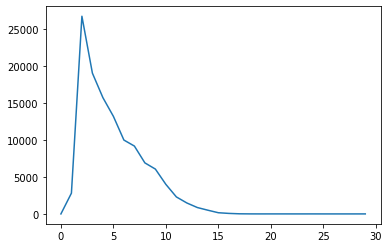

In [55]:
import matplotlib.pyplot as pyplot #import avec alias

liste_effectifs = []
for toto in range(30):
  if toto in dic_longueurs:#on a donc vu des mots de cette longueur
    liste_effectifs.append(dic_longueurs[toto])
  else:#on en n'a pas vu de cette longueur, on ajoute donc un 0
    liste_effectifs.append(0)
pyplot.plot(liste_effectifs)#on "dessine"
pyplot.show()#"on affiche"


Maintenant si on veut faire le même calcul pour l'autre texte on a juste à changer le nom du fichier dans l'étape 1 et à relancer toutes les cellules. Mais si on avait 100 textes à faire ça ne serait pas très pratique. Nous allons donc voir dans l'exercice suivant comment améliorer le code, comment le **factoriser**.